#Обработка на податоците од IMF


In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Податочни множества од IMF


In [ ]:
dataUS = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/US IMF.csv', delimiter=';', header=1, encoding='utf-8')

In [ ]:
dataUS.insert(1, 'Country code', 'US')

In [ ]:
dataUS.rename(columns={'Unnamed: 0': 'Indicator'}, inplace=True)

In [ ]:
dataUS

,Indicator,Country code,2022,Q1 2022,Q2 2022,Q3 2022,Q4 2022
0,Balance of Payments,US,NaN,NaN,NaN,NaN,NaN
1,Current account,US,"-1.012.103,00","-263.229,00","-271.509,00","-260.173,00","-217.192,00"
2,Goods and services,US,"-944.770,00","-245.745,00","-255.825,00","-242.346,00","-200.854,00"
3,Credit,US,"3.039.403,00","696.638,00","777.156,00","783.760,00","781.849,00"
4,Debit,US,"3.984.173,00","942.383,00","1.032.981,00","1.026.106,00","982.703,00"
...,...,...,...,...,...,...,...
889,Deposits,US,NaN,NaN,NaN,NaN,NaN
890,Loans,US,NaN,NaN,NaN,NaN,NaN
891,Repo loans,US,NaN,NaN,NaN,NaN,NaN
892,Other loans,US,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataPK = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/PK IMF.csv', delimiter=';', header=1, encoding='utf-8')

In [ ]:
dataPK.insert(1, 'Country code', 'PK')

In [ ]:
dataPK.rename(columns={'Unnamed: 0': 'Indicator'}, inplace=True)

In [ ]:
dataPK

,Indicator,Country code,2022,Q1 2022,Q2 2022,Q3 2022,Q4 2022
0,Balance of Payments,PK,NaN,NaN,NaN,NaN,NaN
1,Current account,PK,"-12.216,11","-3.902,08","-4.466,85","-2.441,03","-1.406,15"
2,Goods and services,PK,"-37.627,11","-10.238,08","-11.583,85","-9.431,03","-6.374,15"
3,Credit,PK,"38.966,76","10.264,00","10.611,00","9.103,87","8.987,89"
4,Debit,PK,"76.593,87","20.502,08","22.194,85","18.534,90","15.362,04"
...,...,...,...,...,...,...,...
889,Deposits,PK,NaN,NaN,NaN,NaN,NaN
890,Loans,PK,NaN,NaN,NaN,NaN,NaN
891,Repo loans,PK,NaN,NaN,NaN,NaN,NaN
892,Other loans,PK,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataUS.isnull().sum()

,0
Indicator,0
Country code,0
2022,406
Q1 2022,467
Q2 2022,467
Q3 2022,467
Q4 2022,467


In [ ]:
dataPK.isnull().sum()

,0
Indicator,0
Country code,0
2022,660
Q1 2022,662
Q2 2022,660
Q3 2022,660
Q4 2022,660


In [ ]:
cleaned_dataUS = dataUS.dropna()
cleaned_dataPK = dataPK.dropna()

In [ ]:
unique_values = cleaned_dataUS['Indicator'].unique()

In [ ]:
unique_values

array(['Current account', 'Goods and services', 'Credit', 'Debit',
       'Goods', 'General merchandise: export',
       'Net exports of goods under merchanting',
       'Non-monetary gold: export', 'General merchandise: import',
       'Non-monetary gold: import', 'Services',
       'Maintenance and repair services n.i.e., credit',
       'Maintenance and repair services n.i.e., debit',
       'Transport, credit', 'Passenger', 'Transport, debit',
       'Travel, credit', 'Business travel, credit',
       'Personal travel, credit', 'Travel, debit',
       'Business travel, debit', 'Personal travel, debit',
       'Other services, credit', 'Construction services',
       'Insurance and pension services', 'Financial services',
       'Charges for the use of intellectual property n.i.e.',
       'Telecommunication, computer, and information services',
       'Other business services',
       'Personal, cultural, and recreational services',
       'Government goods and services n.i.e.', 'O

In [ ]:
cleaned_dataUS.to_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_US.csv', index=False)

In [ ]:
cleaned_dataPK.to_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_PK.csv', index=False)

In [ ]:
merged_data = pd.concat([dataUS, dataPK], axis=0)

In [ ]:
cleaned_data = merged_data.dropna()

In [ ]:
cleaned_dataPK.isnull().sum()

,0
Indicator,0
Country code,0
2022,0
Q1 2022,0
Q2 2022,0
Q3 2022,0
Q4 2022,0


In [ ]:
df_cleaned

,Indicator,Country code,2022,Q1 2022,Q2 2022,Q3 2022,Q4 2022
1,Current account,PK,"-12.216,11","-3.902,08","-4.466,85","-2.441,03","-1.406,15"
2,Goods and services,PK,"-37.627,11","-10.238,08","-11.583,85","-9.431,03","-6.374,15"
3,Credit,PK,"38.966,76","10.264,00","10.611,00","9.103,87","8.987,89"
4,Debit,PK,"76.593,87","20.502,08","22.194,85","18.534,90","15.362,04"
5,Goods,PK,"-34.407,00","-8.846,00","-10.010,00","-9.133,00","-6.418,00"
...,...,...,...,...,...,...,...
261,"Deposit-taking corporations, except the centra...",PK,"5.240,61","5.486,12","5.636,84","5.424,81","5.240,61"
262,General government,PK,"76.530,75","76.731,00","77.309,08","75.315,90","76.530,75"
263,Other sectors,PK,"20.762,29","18.701,40","20.017,88","19.868,24","20.762,29"
264,of which: other financial corporations,PK,"0,00","0,00","0,00","0,00","0,00"


In [ ]:
#cleaned_data.to_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF.csv', index=False)

## Heatmap на податочното множество и дополнителна анализа за понатамошна обработка

In [ ]:
le = LabelEncoder()
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == 'object':
        cleaned_data[column] = le.fit_transform(cleaned_data[column])

<ipython-input-19-ca316d7e6e6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = le.fit_transform(cleaned_data[column])
<ipython-input-19-ca316d7e6e6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = le.fit_transform(cleaned_data[column])
<ipython-input-19-ca316d7e6e6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
stat_desc = cleaned_data.describe()
print(stat_desc)

        Indicator  Country code        2022     Q1 2022     Q2 2022  \
count  659.000000    659.000000  659.000000  659.000000  659.000000   
mean    54.487102      0.647951  208.444613  199.635812  201.902883   
std     34.365120      0.477972  151.578697  145.701555  147.996949   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%     25.000000      0.000000   42.500000   40.500000   41.000000   
50%     48.000000      1.000000  195.000000  182.000000  185.000000   
75%     81.000000      1.000000  339.500000  324.500000  326.500000   
max    111.000000      1.000000  489.000000  480.000000  485.000000   

          Q3 2022    Q4 2022  
count  659.000000  659.00000  
mean   196.707132  205.23217  
std    143.577143  143.99395  
min      0.000000    0.00000  
25%     44.000000   62.00000  
50%    176.000000  184.00000  
75%    319.500000  327.50000  
max    475.000000  482.00000  


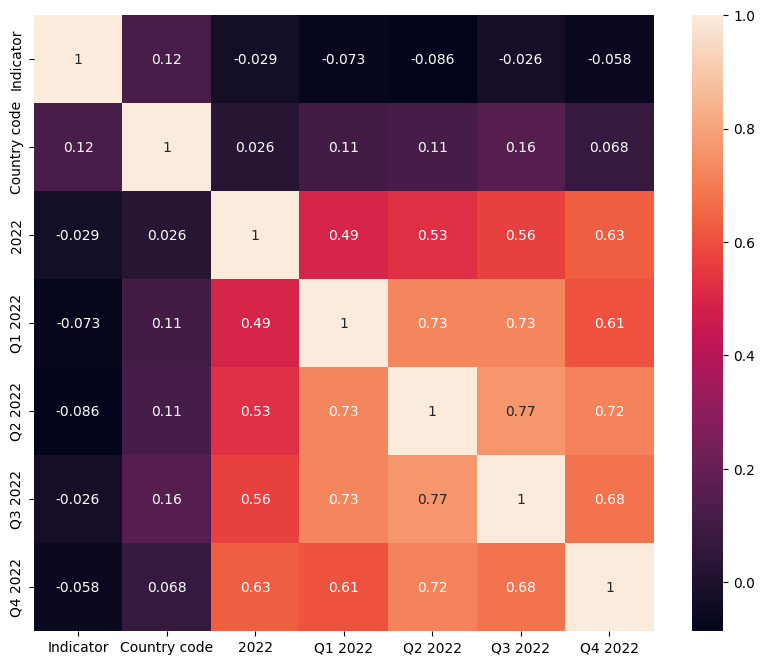

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_data.corr(), annot = True)
plt.show()

In [ ]:
cleaned_data.corr()

,Indicator,Country code,2022,Q1 2022,Q2 2022,Q3 2022,Q4 2022
Indicator,1.000000,0.122687,-0.028576,-0.072578,-0.086400,-0.025646,-0.057856
Country code,0.122687,1.000000,0.025574,0.105131,0.113490,0.156592,0.068052
2022,-0.028576,0.025574,1.000000,0.493425,0.525167,0.564263,0.632823
Q1 2022,-0.072578,0.105131,0.493425,1.000000,0.727819,0.725079,0.608613
Q2 2022,-0.086400,0.113490,0.525167,0.727819,1.000000,0.766174,0.716455
Q3 2022,-0.025646,0.156592,0.564263,0.725079,0.766174,1.000000,0.680624
Q4 2022,-0.057856,0.068052,0.632823,0.608613,0.716455,0.680624,1.000000


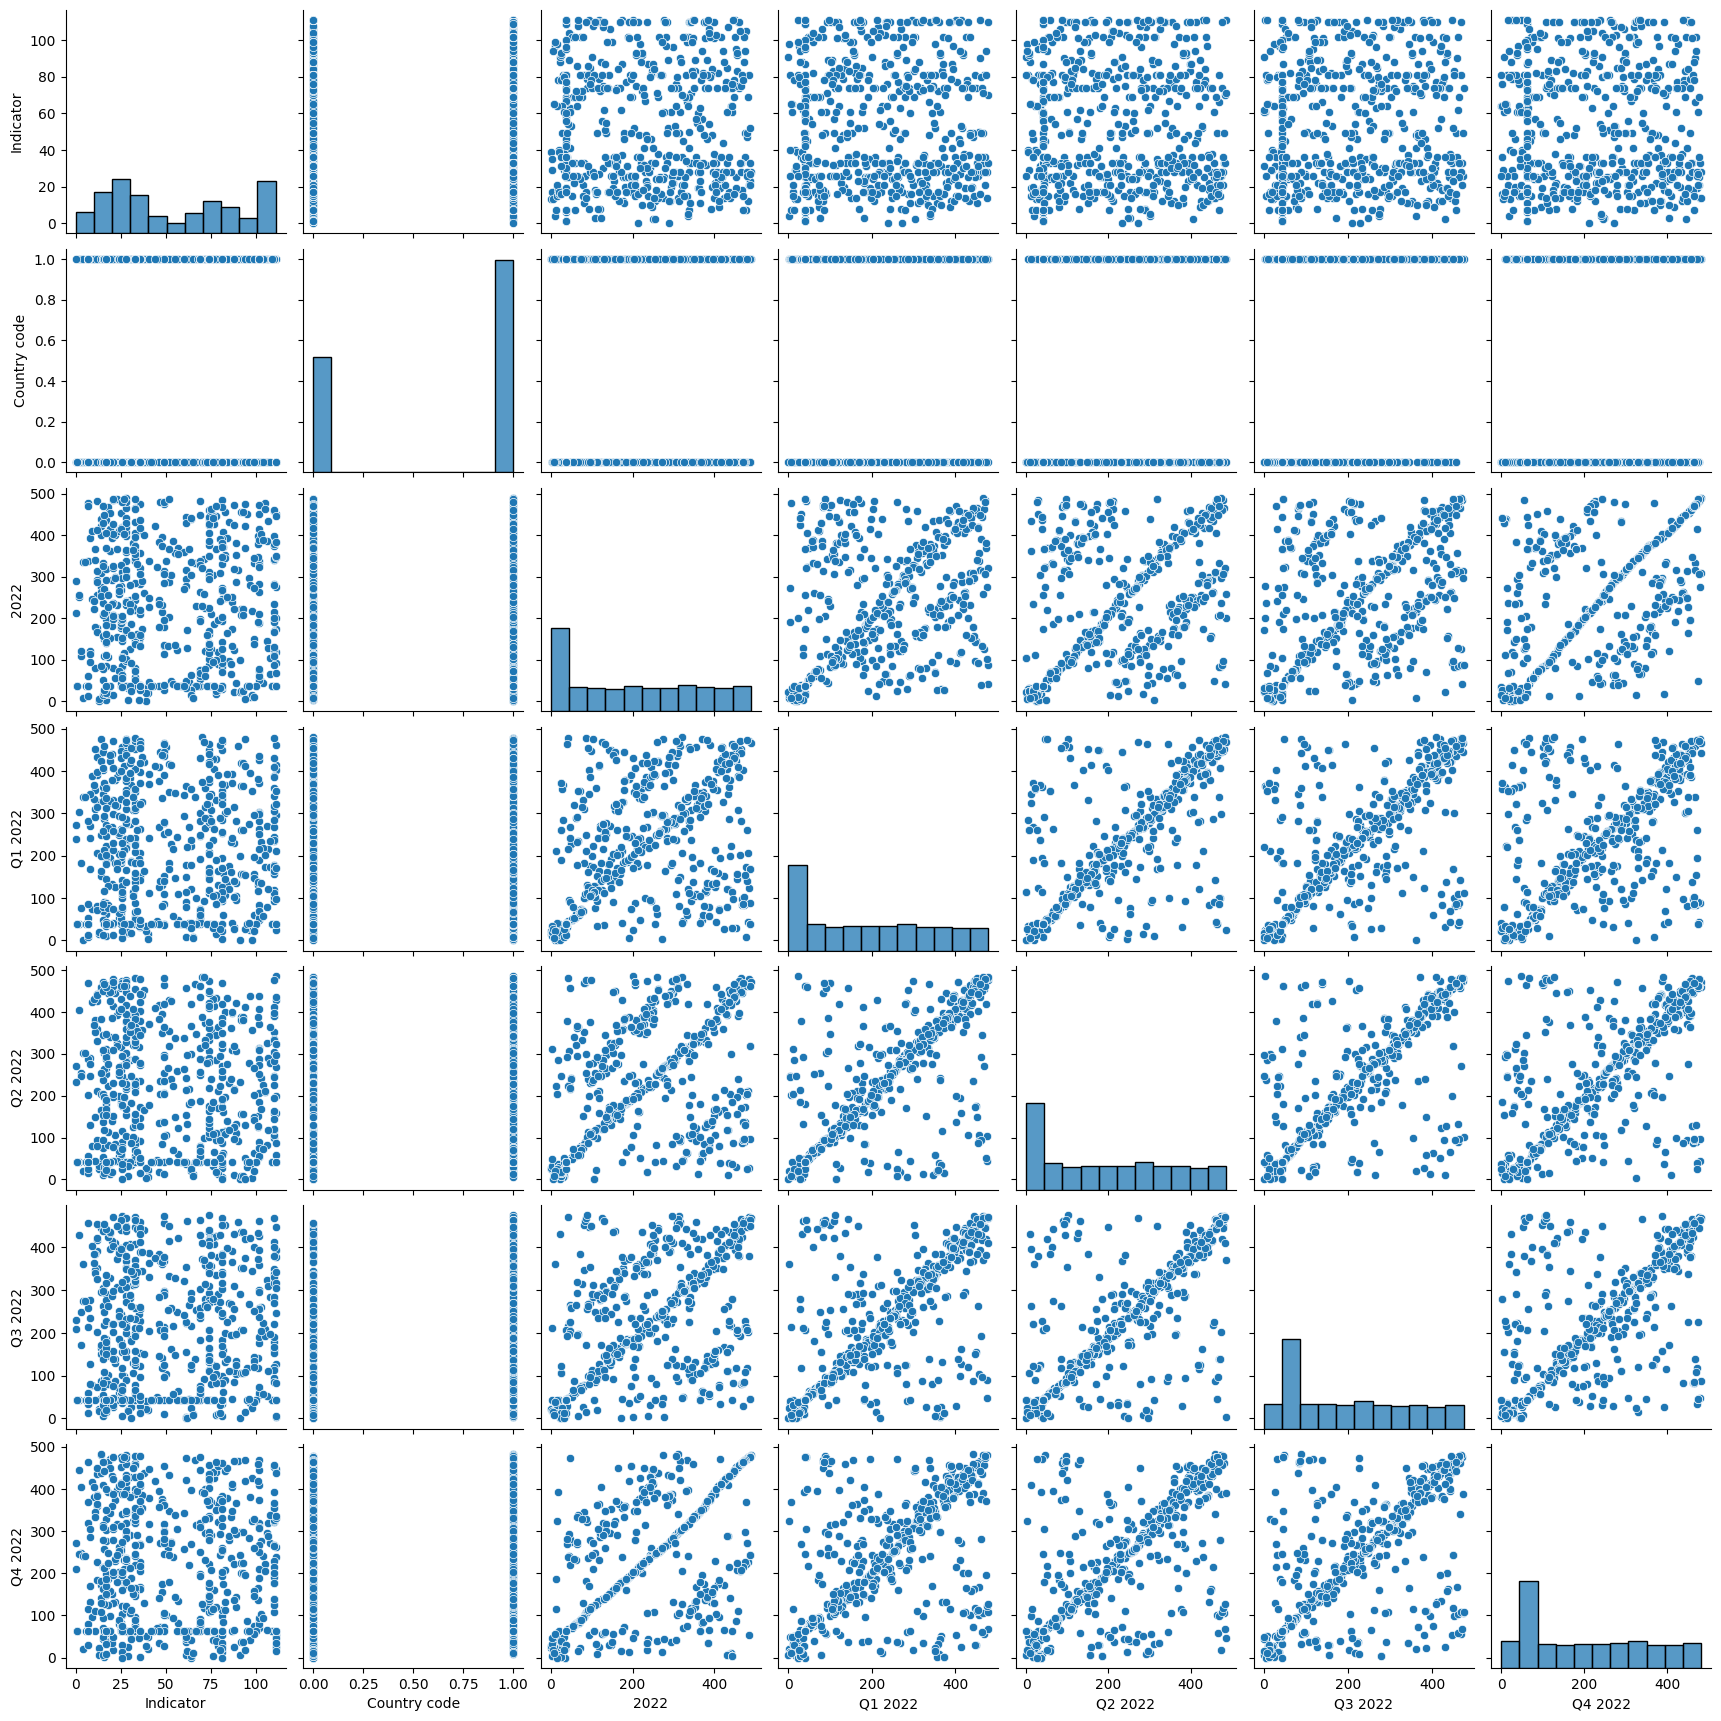

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(cleaned_data)
plt.show()